In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
tc_prep = pd.read_csv('tc_prep.csv')

In [3]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Family,1.00,1.0000,0.000,1.0,0.00
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
Pclass_2,0.00,0.0000,0.000,0.0,0.00


In [4]:
X_train, X_val_test = train_test_split(tc_prep, test_size=0.4, random_state=0)
X_val, X_test = train_test_split(X_val_test, test_size=0.5, random_state=0 )

y_train = X_train['Survived']
y_test = X_test['Survived']
y_val = X_val['Survived']

del X_train['Survived']
del X_test['Survived']
del X_val['Survived']

In [6]:
log_regressionCV = LogisticRegressionCV()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'Cs': param_range,
               'penalty': ['l2']}]
gs = GridSearchCV(estimator=log_regressionCV,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best score = {gs.best_score_}')
print(f'best params: {gs.best_params_}')

c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\nadys\Desktop\Projects\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(


best score = 0.6896631823461092
best params: {'Cs': 100, 'penalty': 'l2'}


In [7]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

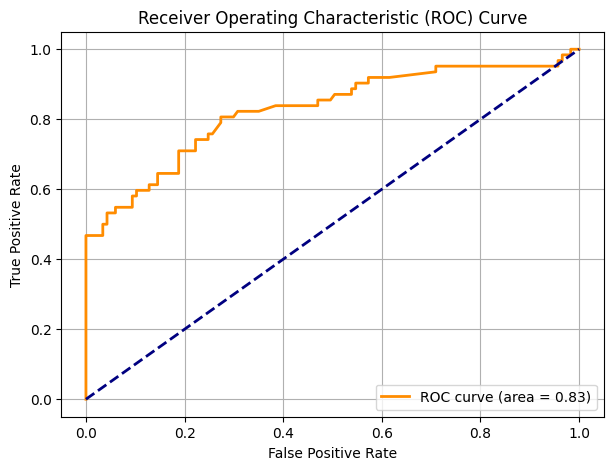

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

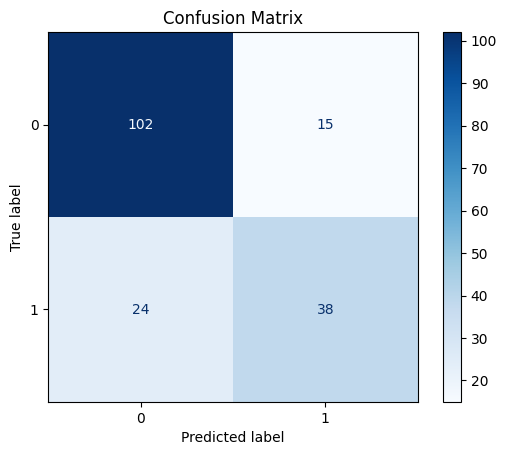

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [15]:
f1_score(y_test, y_pred)

0.6608695652173913